In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
os.environ['KERAS_BACKEND'] = 'tensorflow'
import cv2
from scipy.misc import imresize
from keras.models import model_from_json
from glob import glob
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import tensorflow as tf

/home/tking/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import cv2
from scipy.misc import imresize
from keras.layers import Lambda
from keras.layers import ZeroPadding2D

In [25]:
cnt=0
arr=[]
for fn in glob(r"../../images/flower/*.jpg"):
    if os.path.exists(fn) and cnt <100:
        
        #image = img_to_array(load_img(fn))
       
            
        image=cv2.imread(fn)
       
        if not image is None:
            if np.mean(image)<250:
                imageRGB= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                arr.append(imageRGB)
       
       
    cnt+=1

In [26]:
len(arr)

50

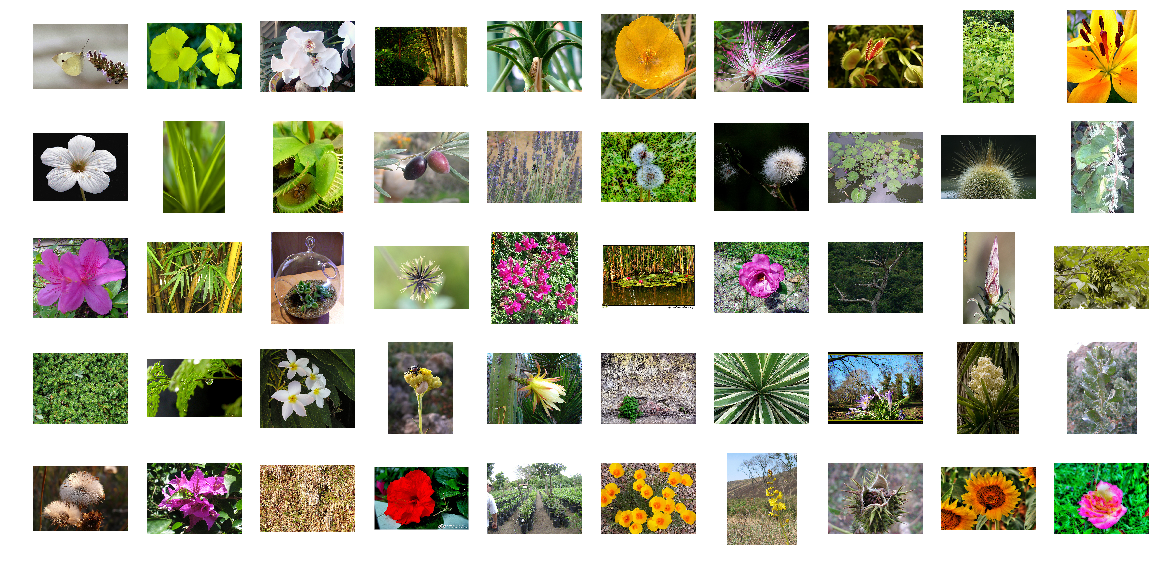

In [27]:
cnt2=1
plt.figure(figsize=(20,20))
for img in arr:
    
    plt.subplot(10,10,cnt2)
    plt.imshow(img)
    
    cnt2+=1
    plt.axis('off')
plt.show()

In [28]:
new_arr=[]
for img in arr:
    resized_img = imresize(img, (400, 400, 3))
    new_arr.append(resized_img)

/home/tking/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
Xs=[]
Ys=[]
X3=np.zeros([1,400,400,3])

for image in new_arr:
    X = rgb2lab(1.0/255*image)[:,:,0]
    Y = rgb2lab(1.0/255*image)[:,:,1:]
    Y /= 128
    X = X.reshape(1, 400, 400, 1)
    X3[:,:,:,0]=X[:,:,:,0]
    X3[:,:,:,1]=X[:,:,:,0]
    X3[:,:,:,2]=X[:,:,:,0]
    Y = Y.reshape(1, 400, 400, 2)
    Xs.append(X)
    Ys.append(Y)
Xs=np.array(Xs)
Ys=np.array(Ys)
num=len(Xs)
X=np.reshape(Xs, (num, 400, 400, 1))
Y=np.reshape(Ys, (num, 400, 400, 2))

In [43]:
np.max(X)

100.0

In [31]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense,Concatenate

In [57]:

import keras.backend as K
K.clear_session()
input1 = keras.layers.Input(shape=(400,400,1))

x1= Conv2D(64, (3,3), activation='relu' ,padding='same')(input1)
y1= Conv2D(64, (3,3), activation='relu' ,padding='same')(x1)
z1= keras.layers.pooling.MaxPooling2D(pool_size=(2, 2))(y1)

x2= Conv2D(128, (3,3), activation='relu' ,padding='same')(z1)
y2= Conv2D(128, (3,3), activation='relu' ,padding='same')(x2)
z2= keras.layers.pooling.MaxPooling2D(pool_size=(2, 2))(y2)

x3= Conv2D(256, (3,3), activation='relu' ,padding='same')(z2)
y3= Conv2D(256, (3,3), activation='relu' ,padding='same')(x3)
k3= Conv2D(256, (3,3), activation='relu' ,padding='same')(y3)
z3= keras.layers.pooling.MaxPooling2D(pool_size=(2, 2))(k3)

x4= Conv2D(512, (3,3), activation='relu' ,padding='same')(z3)
y4= Conv2D(512, (3,3), activation='relu' ,padding='same')(x4)
k4= Conv2D(512, (3,3), activation='relu' ,padding='same')(y4)

m2= UpSampling2D(size=(2, 2))(y2)
m3= UpSampling2D(size=(4, 4))(k3)
m4= UpSampling2D(size=(8, 8))(k4)

l4= Conv2D(256, (1,1), activation='relu' ,padding='same')(m4)
s1= keras.layers.Add()([l4, m3])
l3= Conv2D(128, (1,1), activation='relu' ,padding='same')(s1)
s2= keras.layers.Add()([l3, m2])
l2= Conv2D(64, (1,1), activation='relu' ,padding='same')(s2)

C= keras.layers.concatenate([y1,l2,l3,l4], axis=-1)

o1= Conv2D(256, (3,3), activation='relu' ,padding='same')(C)
o2= Conv2D(64, (3,3), activation='relu' ,padding='same')(o1)
o3= Conv2D(64, (3,3), activation='relu' ,padding='same')(o2)

O= Conv2D(2, (3,3), activation='relu' ,padding='same')(o2)

model = keras.models.Model(inputs=[input1],outputs=O)
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 400, 400, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 400, 400, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 400, 400, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 200, 200, 64) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [38]:
K.clear_session()
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [58]:
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='mse',metrics=['accuracy'])

In [59]:
model.fit(x=X, 
    y=Y,
    batch_size=5,
    epochs=10, shuffle=True)

Epoch 1/10
50/50 [==============================] - 12s 244ms/step - loss: 0.2549 - acc: 0.2649
Epoch 2/10
50/50 [==============================] - 11s 227ms/step - loss: 0.0432 - acc: 0.1941
Epoch 3/10
50/50 [==============================] - 11s 227ms/step - loss: 0.0432 - acc: 0.1941
Epoch 4/10
20/50 [===========>..................] - ETA: 6s - loss: 0.0491 - acc: 0.2063

KeyboardInterrupt: 

In [54]:
output = model.predict(X[0:2])
np.max(output*128)

0.0

In [42]:
X.shape

(50, 400, 400, 1)

In [55]:
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]*128

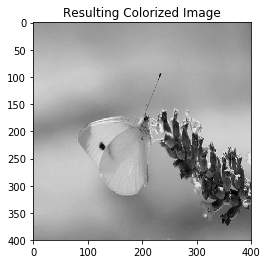

In [56]:
import matplotlib.pyplot as plt
plt.imshow(lab2rgb(cur))
plt.title('Resulting Colorized Image')
plt.show()